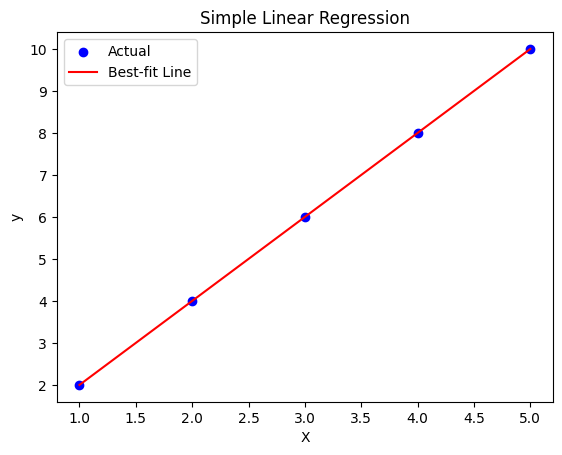

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the independent variable
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Define the dependent variable
y = np.array([2, 4, 6, 8, 10])

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Generate predictions
y_pred = model.predict(X)

# Plot the data points and the best-fit line
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Best-fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Load the dataset (assuming it's stored in a CSV file)
data = pd.read_csv('measurements.csv')

In [ ]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [ ]:
# Remove commas from numeric columns
data['distance']=data['distance'].str.replace(',','.').astype(float)
data['consume']=data['consume'].str.replace(',','.').astype(float)
data['temp_inside']=data['temp_inside'].str.replace(',','.').astype(float)

In [ ]:
# Extract the features (X) and target variable (y)
X = data[['distance', 'speed', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']]
y = data['consume']

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['gas_type'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

         Feature  Coefficient
0       distance     0.003290
1          speed    -0.020768
2   temp_outside    -0.040536
3             AC     0.427731
4           rain     0.610922
5            sun    -0.121871
6   gas_type_E10     0.019333
7  gas_type_SP98    -0.019333


In [ ]:
# Predict fuel consumption for the test dataset
y_pred = model.predict(X_test)

In [ ]:
pd.DataFrame({'Y test':y_test,'Y Predict':y_pred})

,Y test,Y Predict
271,5.6,4.729216
46,5.1,5.169342
167,6.1,5.076150
42,4.6,5.136480
349,4.3,4.527260
...,...,...
3,3.9,4.836909
18,4.9,5.060587
93,4.7,4.813368
108,4.7,5.199983


In [ ]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7673641296720836
